# Summary Notebook

In [2]:
import pandas as pd
from IPython.display import Image

In Sprint 1, we use Domain API to scrape recent rental properties in Victoria. 

In Sprint 2, we gathered all the necessary rental property and external datasets. 

The rental property data was read from a JSON file, and we selected essential features related to the property details, including location (suburb, postcode, latitude, longitude), attributes (bedrooms, bathrooms, car spaces), and pricing information.
We preprocessed the raw data into a more analyzable form by:

· Retaining the critical features from the original dataset.

· Converting the price column into a standardized weekly price using regular expressions to handle various formats (e.g., per week).

· Cleaning the data by filtering out rows with missing latitude, longitude, or price values.

· Further filtering out unreasonable pricing values by setting a threshold of 200 or more per week.

This prepared dataset will serve as the foundation for further analysis and modeling tasks.

We utilized Statistical Areas Level 2 (SA2) to derive population forecasts and analyze affluence.

For population forecasting, we calculated the overall average growth rate by using pct_change for each year and predicted growth for the next three years (2024-2026). The growth rates were then visualized with Folium, using the SA2 area Shapefile. The top five regions with the highest predicted growth rates are: `Clyde North - South`, `Point Cook - South`, `Cranbourne North - East`, `Clyde North - North`, and `Doreen - South`.

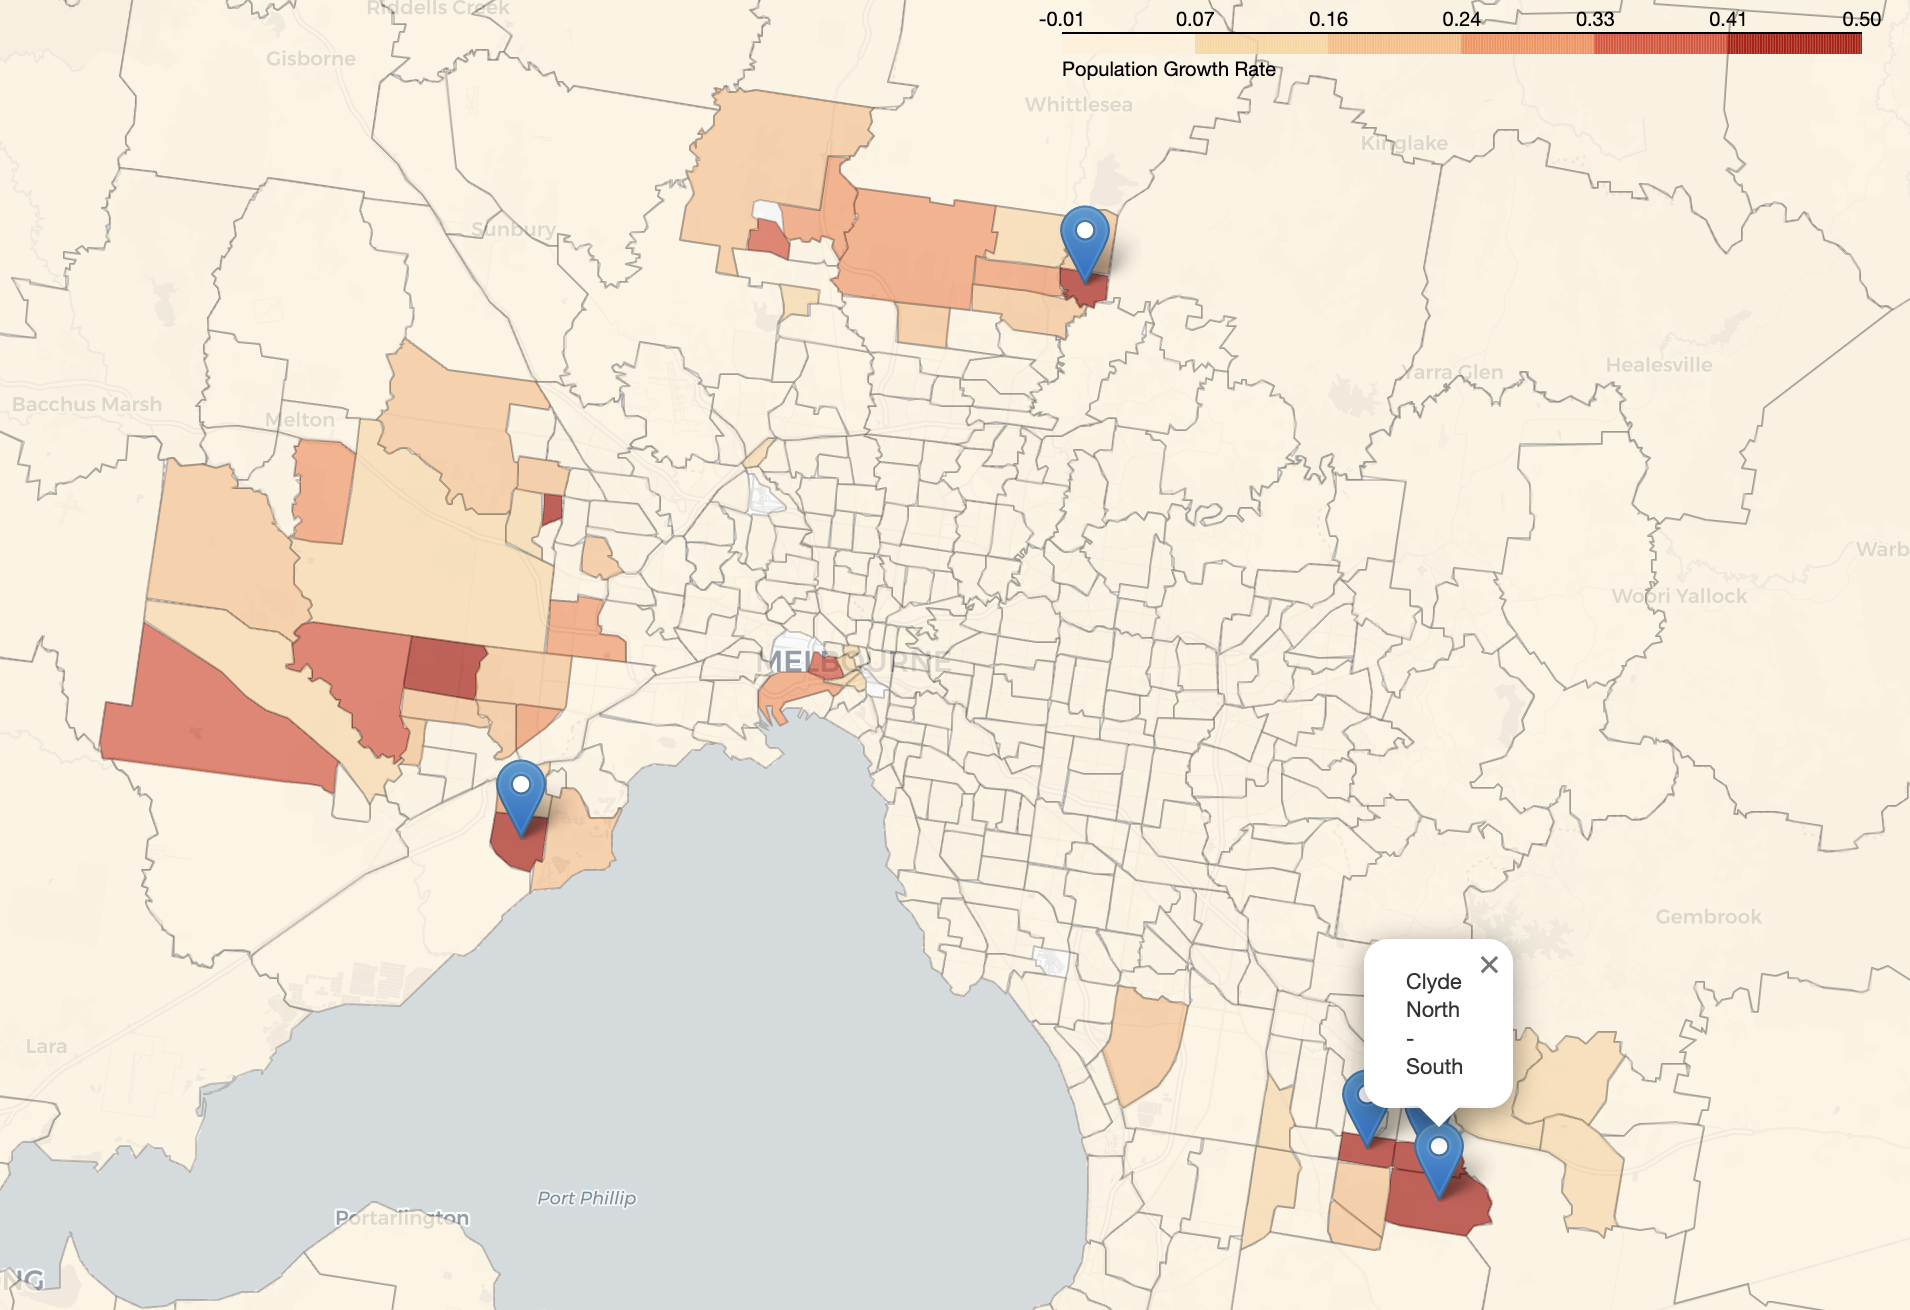

In [7]:
Image(filename='../plots/population_forecast.png',width=800, height=400)

Then, we used Statistical Areas Level 2 (SA2) to derive affluence based on income data from 2016 to 2021. The affluence index we defined is a weighted combination of 70% average income and 30% population growth rate. The results were visualized using an SA2 shapefile. 

The top five SA2 areas with the highest affluence index are: `Port Melbourne`, `East Melbourne`, `West Melbourne - Industrial`, `Richmond (South) - Cremorne`, and `Toorak`, primarily located around the central areas.


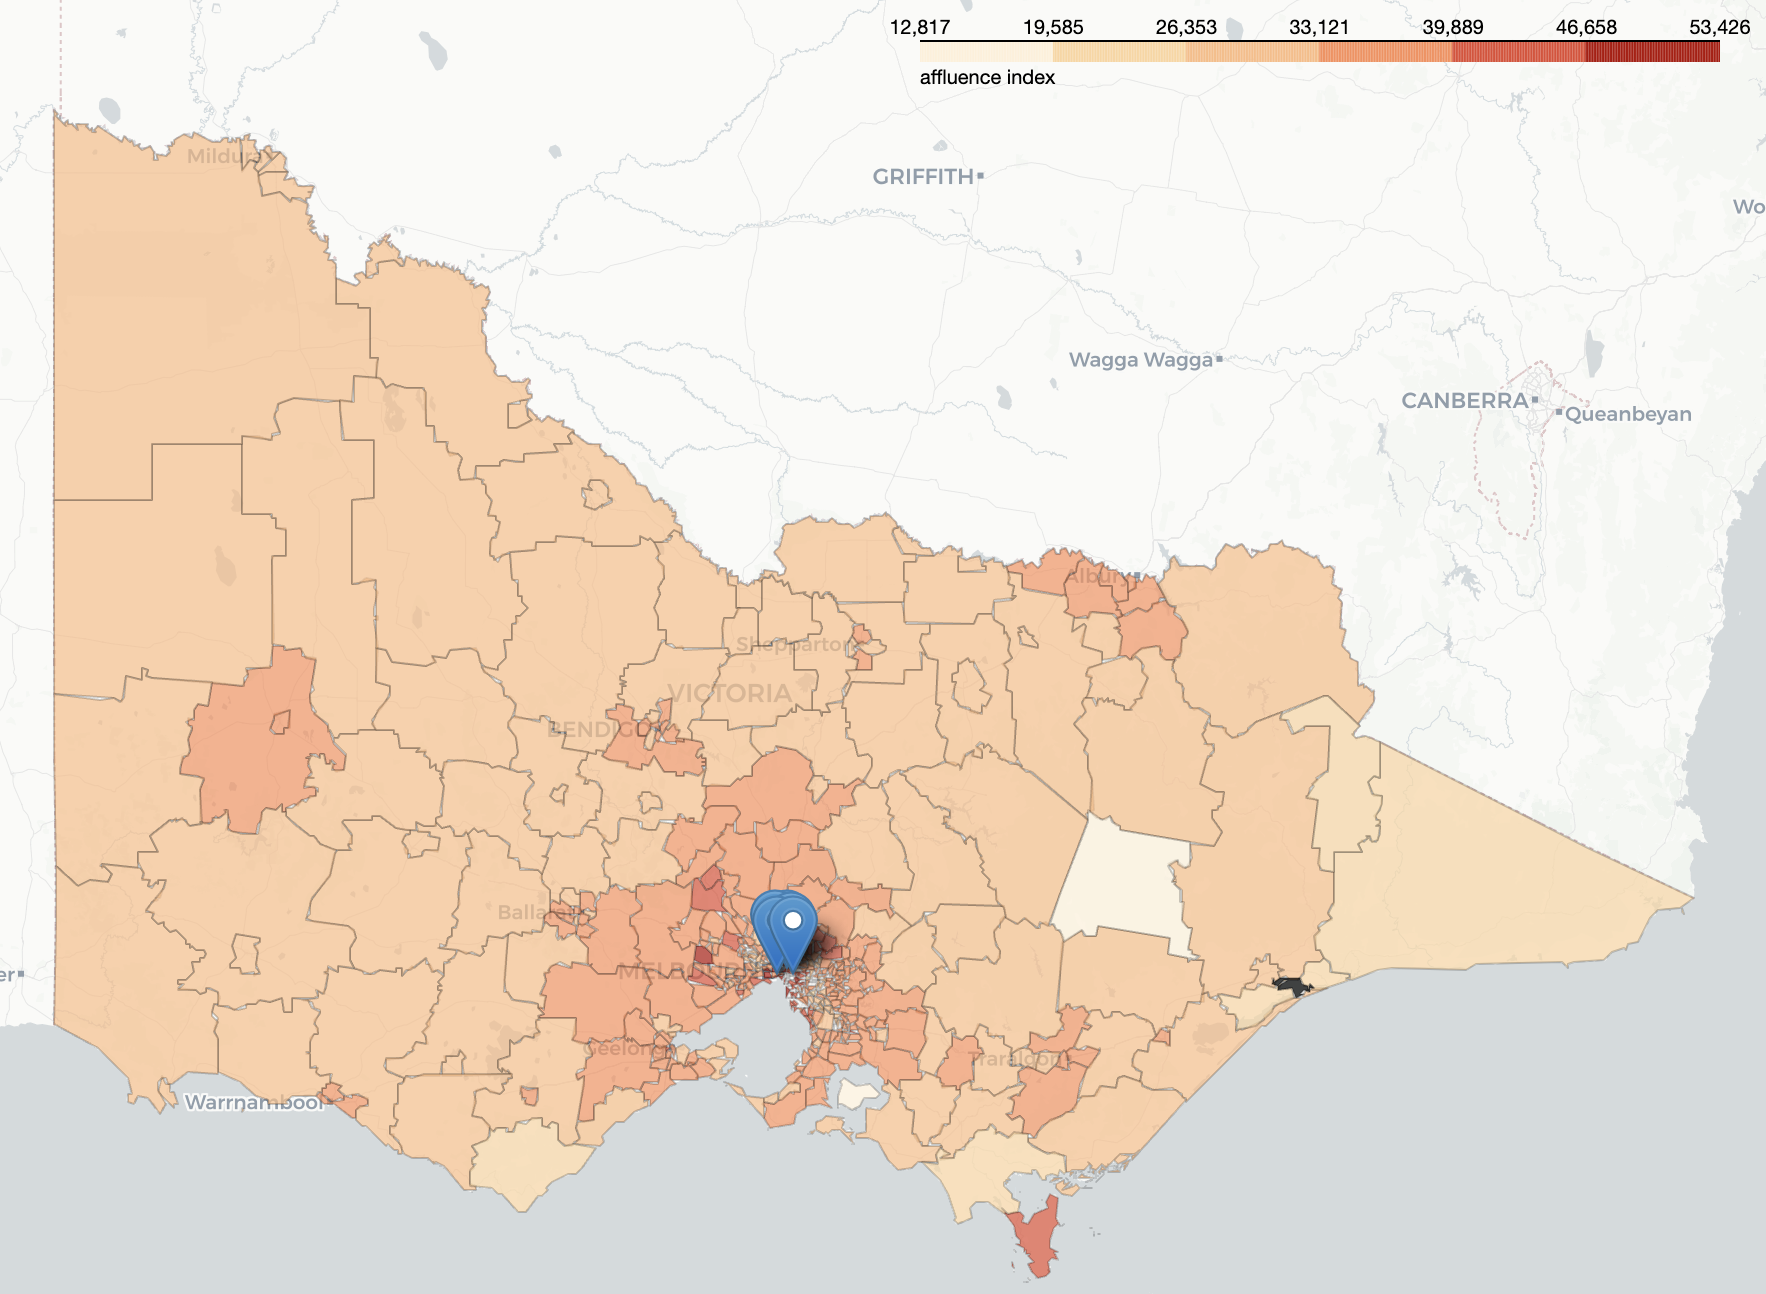

In [8]:
Image(filename='../plots/affluence_index.png',width=800, height=400)

In Sprint 3, we began working with the OpenStreetMap API to calculate the proximity to key locations, including the nearest train station, school, and Melbourne CBD.


**Analysis needed**

In [ ]:
Image(filename='../plots/correlation_heatmap.png',width=800, height=400)

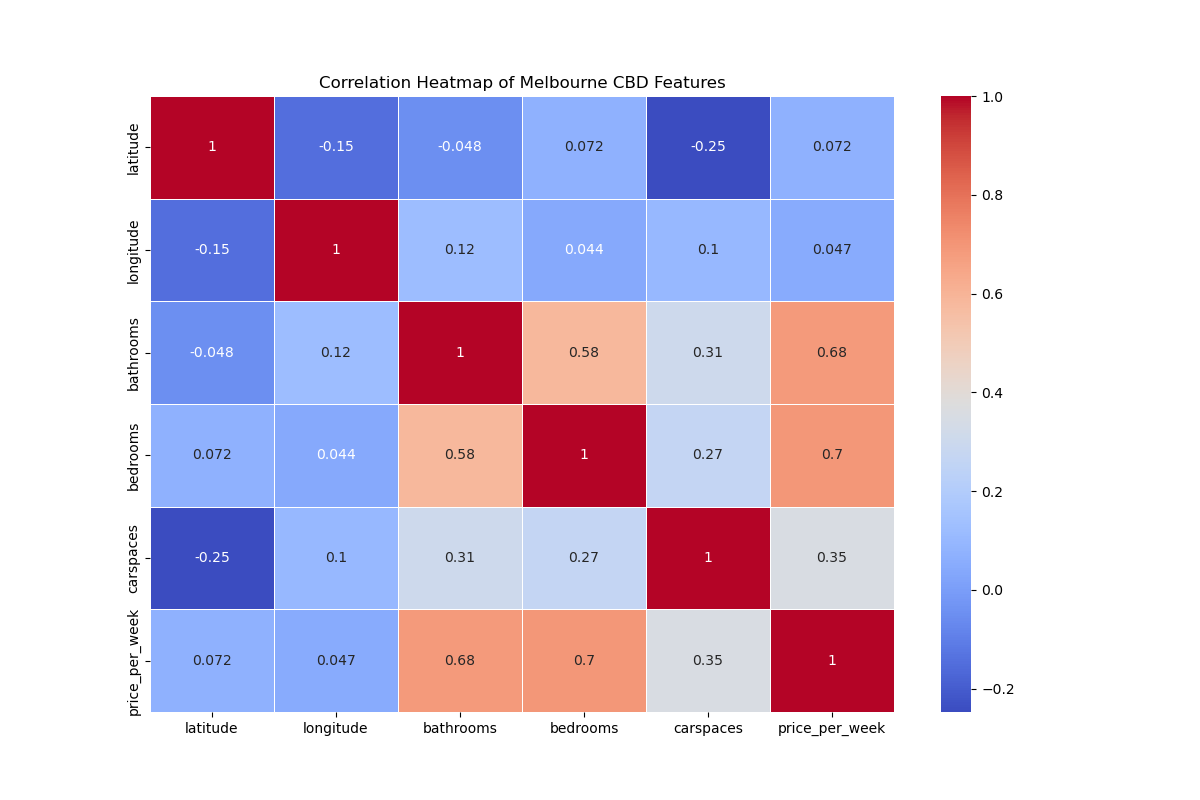

In [4]:
Image(filename='../plots/correlation_heatmap_of_melbCBD.png',width=800, height=400)

As postcode 3000 (Melbourne CBD) accounted for 7.43% of the total data, we compared the overall dataset with data filtered specifically for Melbourne CBD.

In the Melbourne CBD heatmap, the correlations between features and rental prices generally became stronger compared to the overall dataset. For example, bedrooms, bathrooms, and car spaces showed a much higher correlation with rental prices. This may be due to the higher demand for space and amenities in the city center, where properties are more valuable, and parking is scarce.

This comparison helps to highlight the unique dynamics of the Melbourne CBD rental market in contrast to the broader dataset.

**External Features Analysis**

Train Station, School and CBD's influence on rent price

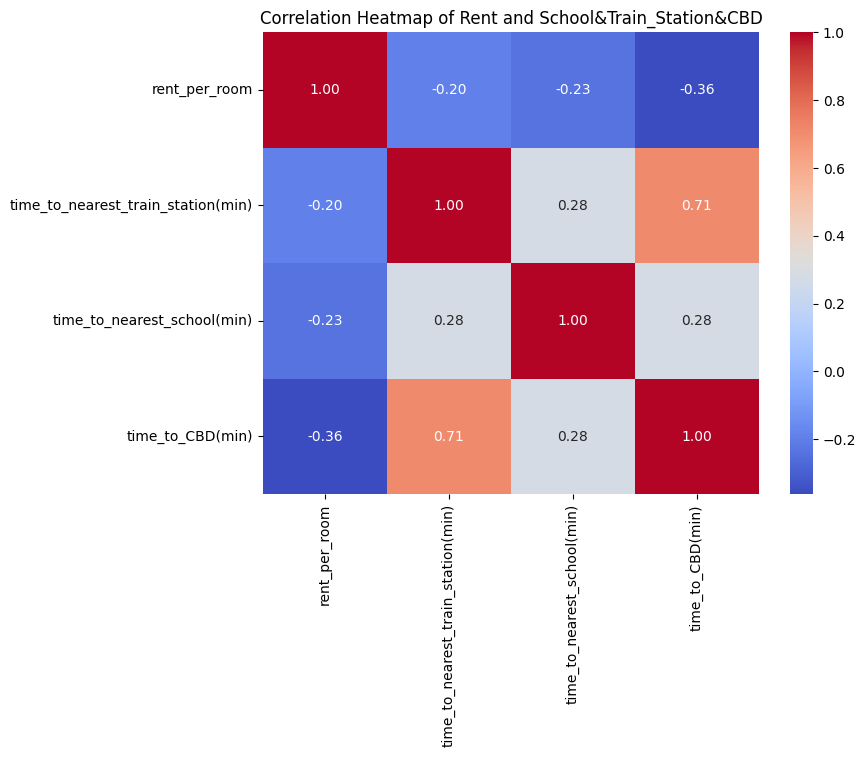

In [11]:
Image(filename='../plots/rent_school_train_CBD_heatmap.png')

The correlation analysis shows that the most significant factor that influence rent price is the distance to the CBD, with a moderate negative correlation of -0.36. This indicates that properties closer to the CBD tend to have higher rental prices. The distance to the nearest train station and school also negatively correlates with rent (-0.20 and -0.23, respectively), but the effect is weaker compared to the CBD. This suggests that while being closer to train stations and schools slightly increases rental prices, proximity to the CBD is the strongest external factor driving rental prices in the regions analyzed.


income and population's influence on rent price

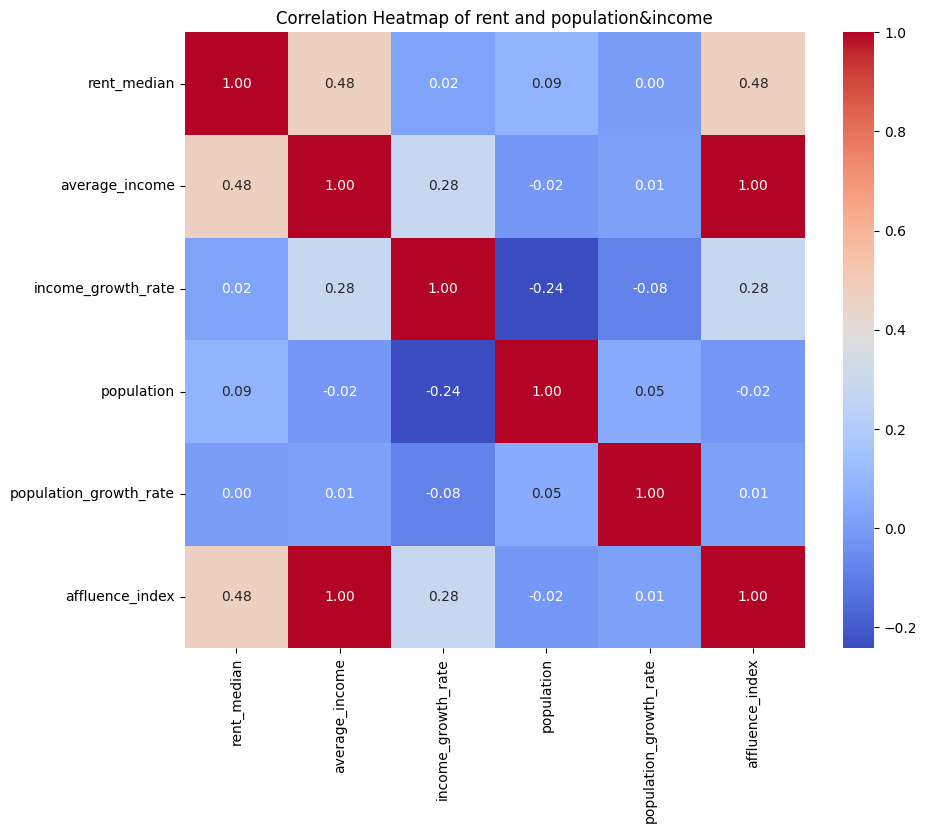

In [10]:
Image(filename='../plots/rent_population_income_heatmap.png')

The correlation analysis reveals that average income is the most important factor influencing rental prices, with a moderate positive correlation of 0.48. This suggests that regions with higher average incomes tend to have higher rental prices. While the affluence index also shows a positive correlation with rent, its significance mainly stems from its inclusion of income, as population itself has a very weak correlation with rental prices. The population’s contribution to the affluence index is negligible, indicating that demographic factors like population size and growth rate have an insignificant impact on rental prices compared to income. Thus, income alone is the primary driver of rental prices among the variables analyzed.

### Question 3:liveable and affordable

Q3: What are the most liveable and affordable suburbs according to your chosen metrics?

liveable suburb: Livable suburb provide enough amenities to make life easier, as well as lower financial stress for residents.

affordable suburb: affordable suburb to focus on the income of the residents and the rent of the housing stock, much times yearly income to yearly rent means more affordable.

For analysis liveability:

1.calculate the count of infrastructures(school and train station) nearby each suburb and statistics on the sum of populations and the average value of rents in different regions.

2.Assign different weights to school counts, train counts, population, and rent to calculate the viability index for each school.

3.draw a map, add layers, add markers and add heat map of population.

In [7]:
liveable_index = pd.read_csv("../data/curated/liveability_index")

In [8]:
liveable_index.iloc[:10,:]

Unnamed: 0  Address_Postcode  school_count  postcode  train_count  \
0         291            3352.0      0.444444      3352     1.000000   
1         610            3825.0      0.444444      3825     0.491803   
2         289            3350.0      1.000000      3350     0.360656   
3         508            3691.0      0.259259      3691     0.590164   
4         638            3875.0      0.370370      3875     0.557377   
5         413            3551.0      0.370370      3551     0.655738   
6         412            3550.0      0.740741      3550     0.245902   
7         708            3977.0      0.962963      3977     0.180328   
8         307            3377.0      0.259259      3377     0.409836   
9         360            3461.0      0.111111      3461     0.442623   

       2023  price_per_week  liveability_index  
0  0.601994        0.154067           0.463068  
1  0.858425        0.019737           0.402194  
2  0.540677        0.114079           0.382109  
3  1.000000        0.261404           0.350480  
4  0.450241        0.164286           0.282050  
5  0.313194        0.176316           0.280539  
6  0.444751        0.185938           0.255088  
7  0.296214        0.193026           0.248026  
8  0.401253        0.112281           0.221369  
9  0.540008        0.181579           0.208537

For analysis affordability:

1.calculate affordable index by 
affordable index = $$ \dfrac{yearly income}{yearly rent} $$

2.Render the affordable index as a base colour on the base map, the darker the colour the larger the affordable index, the more affordable the suburb is.



In [5]:
affordable_index = pd.read_csv('../data/curated/rent_income_2023-24.csv')
affordable_index = affordable_index.sort_values(by='affordable index of 2023-24',ascending=False)

In [6]:
affordable_index.iloc[:10,:]

Unnamed: 0  postcode        SA2              suburb   latitude  \
621          621      3212  203021043                Lara -38.013475   
2680        2680      3981  212011548         Koo Wee Rup -38.181543   
1324        1324      3000  206041119           Melbourne -37.812024   
988          988      3058  206011497        Coburg North -37.721361   
994          994      3058  210031236        Coburg North -37.721361   
2260        2260      3081  209011199  Heidelberg Heights -37.732063   
1678        1678      3181  206061136             Windsor -37.853356   
782          782      3690  204031492             Wodonga -36.128816   
1670        1670      3181  206061136             Prahran -37.848507   
3955        3955      3396  215011394            Hopetoun -35.733631   

       longitude  median income of 2023-24  median rent per week of 2023-24  \
621   144.401553              60759.903158                          10400.0   
2680  145.469598              60515.983555                          10400.0   
1324  144.969996              88862.163133                          16120.0   
988   144.958501              62347.983754                          11440.0   
994   144.958501              62347.983754                          11440.0   
2260  145.060126              62008.956946                          11440.0   
1678  144.992530              81175.176456                          15080.0   
782   146.863823              55626.836071                          10400.0   
1670  144.990328              81175.176456                          15990.0   
3955  142.366467              52549.283369                          10400.0   

      affordable index of 2023-24  
621                      5.842298  
2680                     5.818845  
1324                     5.512541  
988                      5.449999  
994                      5.449999  
2260                     5.420363  
1678                     5.382969  
782                      5.348734  
1670                     5.076621  
3955                     5.052816

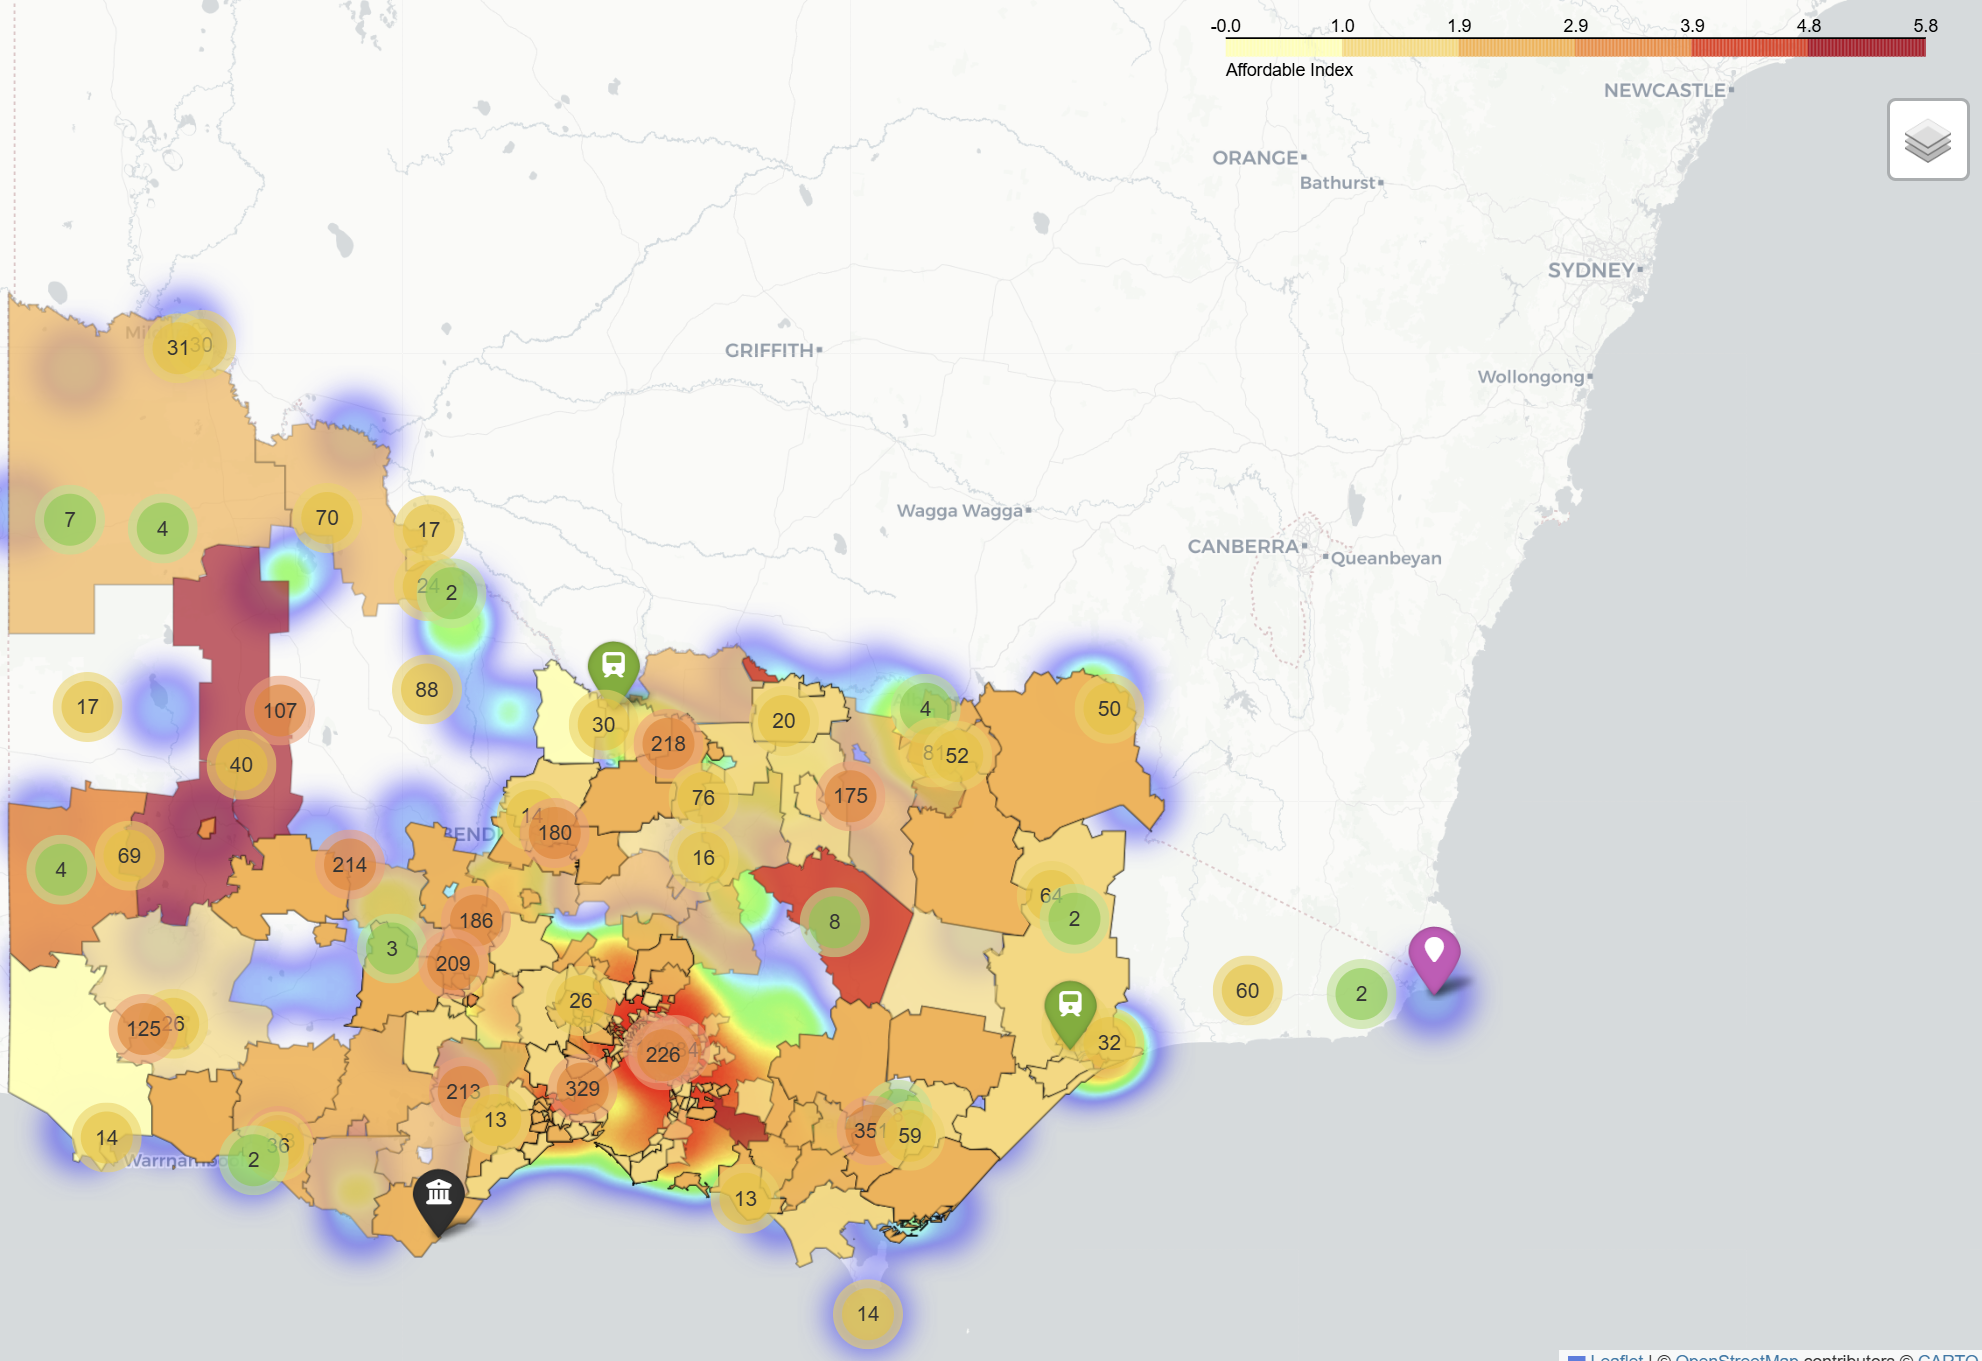

In [4]:
Image(filename='../plots/liveable.png')

In [9]:
all_index = pd.read_csv('../data/curated/index.csv')
all_index.iloc[:10,:]

Unnamed: 0  postcode     index
0         712      3981  0.839035
1         610      3825  0.789927
2         327      3409  0.736872
3         321      3396  0.723167
4         289      3350  0.595850
5         530      3722  0.593363
6         507      3690  0.588638
7         267      3318  0.580545
8         291      3352  0.563594
9         549      3747  0.553795

The affordable index and liveable index were taken in the ratio of 3:7 to get the total index, from which it was concluded that 3981 was the most liveable and affordable suburb. from the image it can also be seen that 3981 has the darkest base colour (the most affordable) and the peripheral markers are also very high (there are many daily amenities in the neighbourhood, which enhances the livability of the area very well). 

So we conclude that 3981 is the most liveable and affordable suburb in Victoria State.

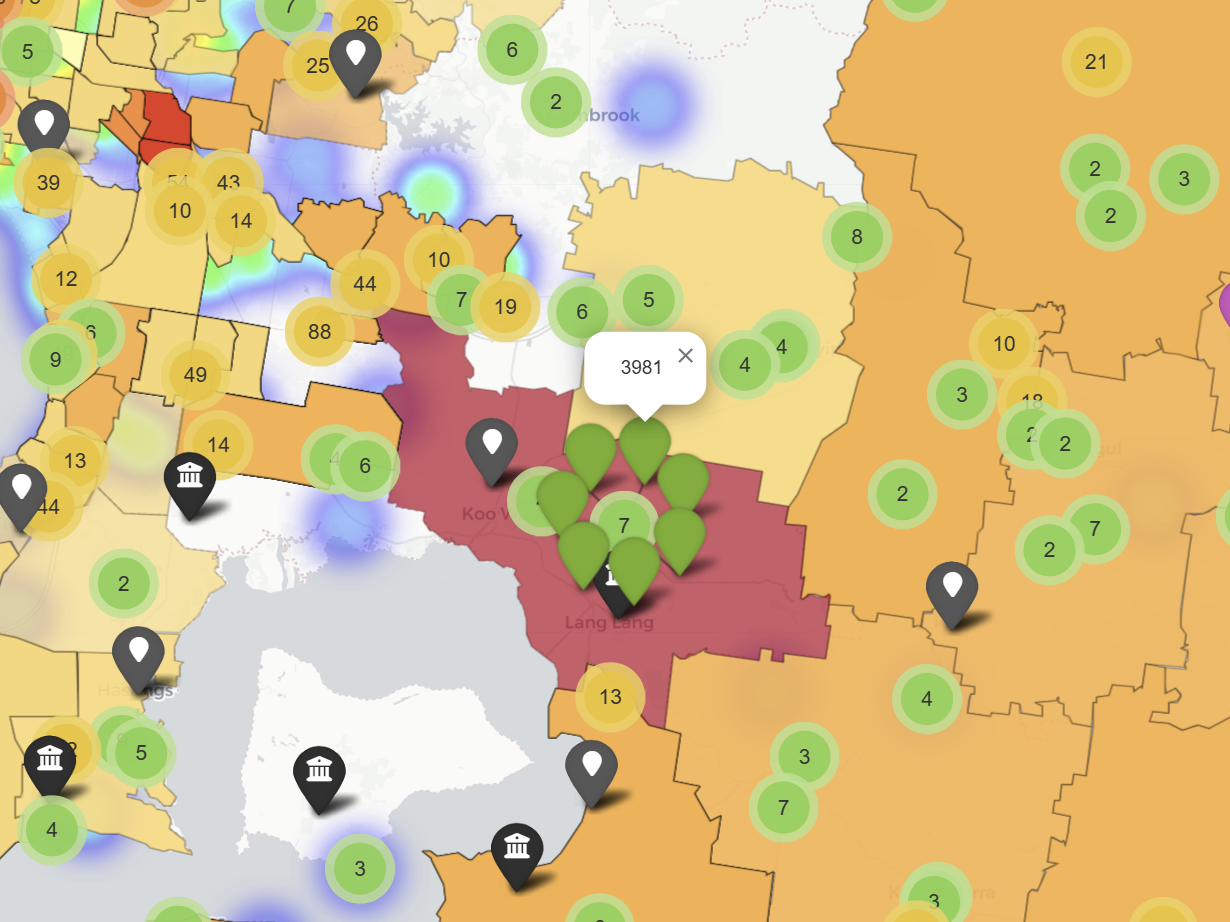

In [12]:
Image(filename='../plots/liveable_3981.png')